In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.shape

(891, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data = df.drop(columns, axis=1)

In [11]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third


In [12]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second
887,1,1,female,19.0,0,0,30.0000,S,First
888,0,3,female,NaN,1,2,23.4500,S,Third
889,1,1,male,26.0,0,0,30.0000,C,First


In [14]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [16]:
print(df['embarked'].mode())

0    S
Name: embarked, dtype: object


In [ ]:
print(df['embarked'].mode()[0])

In [17]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data Analysis

In [19]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

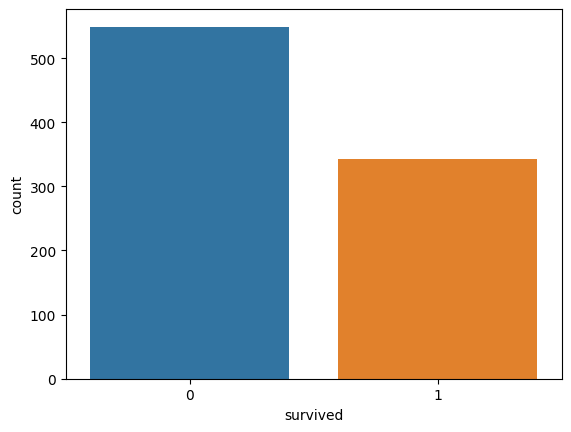

In [25]:
sns.countplot(x='survived', data=df)

In [24]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

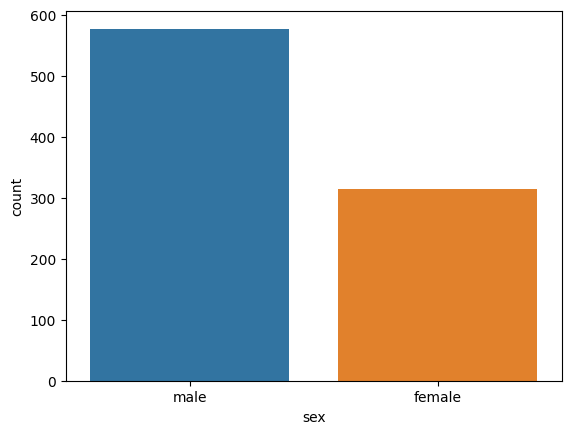

In [23]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='sex', ylabel='count'>

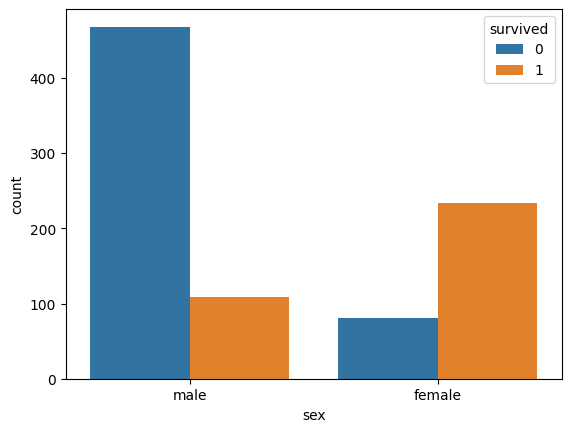

In [27]:
sns.countplot(x='sex', hue='survived', data=df)

<Axes: xlabel='pclass', ylabel='count'>

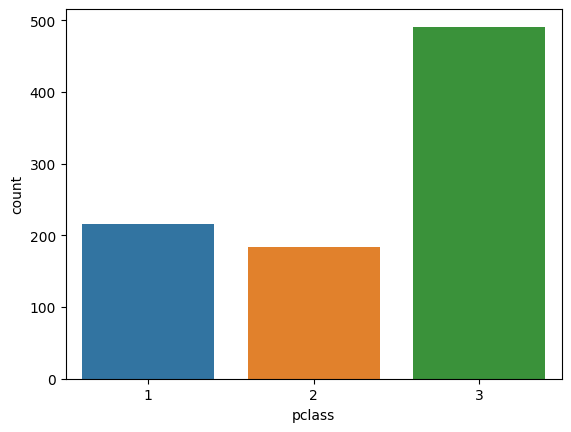

In [29]:
sns.countplot(x='pclass', data=df)

<Axes: xlabel='pclass', ylabel='count'>

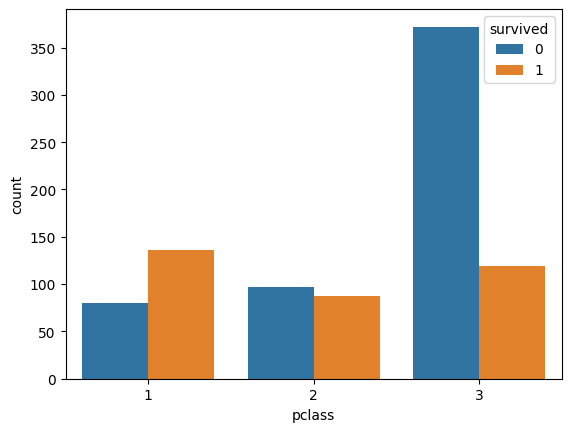

In [30]:
sns.countplot(x='pclass', hue='survived', data=df)

In [31]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [32]:
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [33]:
df.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [34]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,0,Third,man,True,NaN,Southampton,no,True


In [48]:
data[data['sex'].str.match("female")].count()

survived    314
pclass      314
sex         314
age         261
sibsp       314
parch       314
fare        314
embarked    312
class       314
dtype: int64

In [49]:
data[data['sex'].str.match("male")].count()

survived    577
pclass      577
sex         577
age         453
sibsp       577
parch       577
fare        577
embarked    577
class       577
dtype: int64

In [50]:
gender = pd.get_dummies(data['sex'], drop_first=True)

In [51]:
data['gender'] = gender

In [52]:
data.drop('sex', axis=1,inplace=True)

In [54]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,gender
0,0,3,22.0,1,0,7.2500,S,Third,1
1,1,1,38.0,1,0,71.2833,C,First,0
2,1,3,26.0,0,0,7.9250,S,Third,0
3,1,1,35.0,1,0,53.1000,S,First,0
4,0,3,35.0,0,0,8.0500,S,Third,1


In [56]:
change = {'First':1 ,'Second':2,'Third':3}
data['class'] = data['class'].replace(change)

In [58]:
change = {'C':1 ,'Q':2,'S':3}
data['embarked'] = data['embarked'].replace(change)

In [61]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,gender
0,0,3,22.0,1,0,7.2500,3.0,3,1
1,1,1,38.0,1,0,71.2833,1.0,1,0
2,1,3,26.0,0,0,7.9250,3.0,3,0
3,1,1,35.0,1,0,53.1000,3.0,1,0
4,0,3,35.0,0,0,8.0500,3.0,3,1


In [62]:
column_name = 'embarked'
data = data.dropna(subset = [column_name],axis = 0)

In [63]:
data['age'].fillna(data['age'].mean() , inplace=True)

In [66]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [67]:
x

,pclass,age,sibsp,parch,fare,embarked,class,gender
0,3,22.000000,1,0,7.2500,3.0,3,1
1,1,38.000000,1,0,71.2833,1.0,1,0
2,3,26.000000,0,0,7.9250,3.0,3,0
3,1,35.000000,1,0,53.1000,3.0,1,0
4,3,35.000000,0,0,8.0500,3.0,3,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,3.0,2,1
887,1,19.000000,0,0,30.0000,3.0,1,0
888,3,29.642093,1,2,23.4500,3.0,3,0
889,1,26.000000,0,0,30.0000,1.0,1,1


In [68]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [70]:
X_train, X_test, Y_train , Y_test = train_test_split(x , y,test_size = 0.2 , random_state=1)

In [71]:
model = LogisticRegression()

In [72]:
print(X_train.shape , Y_train.shape)

(711, 8) (711,)


In [73]:
model.fit(X_train , Y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
accuracy = accuracy_score(Y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.84
